# Assignment 2

Download the ipynb file and implement

## Installing required libraries

* Librosa
* Numpy
* Matplotlib
* Scikit-learn

In [4]:
!pip install ipykernel librosa numpy matplotlib scikit-learn joblib pandas seaborn

     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
      --------------------------------------- 0.2/11.1 MB 5.3 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/11.1 MB 8.1 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/11.1 MB 10.0 MB/s eta 0:00:01
     ------ --------------------------------- 1.8/11.1 MB 10.3 MB/s eta 0:00:01
     ------ --------------------------------- 1.9/11.1 MB 9.4 MB/s eta 0:00:01
     ------- -------------------------------- 2.1/11.1 MB 7.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.2/11.1 MB 6.9 MB/s eta 0:00:02
     --------- ------------------------------ 2.7/11.1 MB 7.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.2/11.1 MB 7.8 MB/s eta 0:00:02
     ------------- -------------------------- 3.7/11.1 MB 8.1 MB/s eta 0:00:01
     --------------- ------------------------ 4.3/11.1 MB 8.6 MB/s eta 0:00:01
     ----------------- ---------------------- 4.7/11.1 MB


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Libraries
* `os` and `glob`: For file handling and pattern matching.
* `librosa`: For audio processing and feature extraction.
* `numpy`: For numerical operations.
* `pandas`: For data manipulation (not used in this script but commonly used in similar projects).
* `matplotlib.pyplot`: For plotting and visualizing features.
* `sklearn modules`: For machine learning tasks

In [5]:
  import os
  import glob
  import librosa
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn.preprocessing import LabelEncoder, StandardScaler
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  import joblib

 ## Defining Emotions and Observed Emotions

* `emotions`: A dictionary mapping emotion codes to their descriptive names.
* `observed_emotions`: A list of emotions we want to recognize and classify.

In [7]:
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

observed_emotions = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

##  Feature Extraction Function

* Refer to the following link for feature extraction functions: https://librosa.org/doc/main/feature.html

* `librosa.load`: Loads the audio file and returns the audio time series (y) and the sampling rate (sr).
* `np.array([])`: Initializes an empty numpy array to hold features.

#### MFCC(Mel-Frequency Cepstral Coefficient):
* `librosa.feature.mfcc`: Extracts MFCCs from the audio signal.
* `np.mean(..., axis=0)`: Averages MFCCs over time.
* `np.hstack`: Horizontally stacks features into a single array.

#### Chromagram:
* `librosa.stft`: Computes the Short-Time Fourier Transform (STFT) of the audio signal.
* `librosa.feature.chroma_stft`: Computes the chromagram (a representation of the 12 pitch classes).

#### Mel-scaled Spectrogram:
* `librosa.feature.melspectrogram`: Computes the mel-scaled spectrogram.

#### Spectral Contrast:
* `librosa.feature.spectral_contrast`: Computes the spectral contrast, which describes the difference in amplitude between peaks and valleys in the sound spectrum.

#### Tonnetz:
* `librosa.feature.tonnetz`: Computes the Tonnetz features, which capture tonal centroid features from harmonic signal.

In [9]:
def extract_features(file_name):
    y, sr = librosa.load(file_name, sr=None)
    features = np.array([])

    # Extract MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    features = np.hstack((features, mfccs))

    # Extract Chromagram
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, chroma))

    # Extract Mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    features = np.hstack((features, mel))

    # Extract Spectral Contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, contrast))

    # Extract Tonnetz (Tonal Centroid)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0)
    features = np.hstack((features, tonnetz))

    return features

## Feature Analysis - Section Specific Task
* Extract features of dataset without balancing dataset
* Get emotion labels of all instances in dataset `(numpy array)`
* Get dimension and list for each of the classes
* Create a .csv of entire dataset and extracted features with emotion column (label)
* Perform class-wise graphical analysis of dataset
* .csv file has to be submitted



In [24]:
import os
import librosa
import numpy as np
import pandas as pd

CHUNK_DURATION = 1.0  # in seconds
SAMPLE_RATE = 16000   # consistent with training and real-time inference

def parse_emotion_from_filename(filename):
    emotion_code = filename.split('-')[2]
    return emotions[emotion_code]  # e.g., '01' -> 'neutral'

def extract_features(y, sr):
    features = np.array([])

    # MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    features = np.hstack((features, mfccs))

    # STFT for chroma and contrast
    stft = np.abs(librosa.stft(y, n_fft=min(512, len(y))))

    # Chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, chroma))

    # Mel
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=min(512, len(y))).T, axis=0)
    features = np.hstack((features, mel))

    # Spectral Contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
    features = np.hstack((features, contrast))

    # Tonnetz
    if len(y) >= 512:
        y_harm = librosa.effects.harmonic(y)
        tonnetz = np.mean(librosa.feature.tonnetz(y=y_harm, sr=sr).T, axis=0)
        features = np.hstack((features, tonnetz))
    else:
        features = np.hstack((features, np.zeros(6)))  # padding if too short

    return features

def save_features_to_csv_chunked(directory_path, csv_filename):
    features_list = []
    emotion_labels = []

    for actor_folder in os.listdir(directory_path):
        actor_path = os.path.join(directory_path, actor_folder)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(actor_path, file)
                    emotion_label = parse_emotion_from_filename(file)

                    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                    total_duration = librosa.get_duration(y=y, sr=sr)
                    num_chunks = int(total_duration // CHUNK_DURATION)
                    samples_per_chunk = int(sr * CHUNK_DURATION)

                    for i in range(num_chunks):
                        start = i * samples_per_chunk
                        end = start + samples_per_chunk
                        chunk = y[start:end]
                        if np.max(np.abs(chunk)) < 0.01:
                            continue  # skip silent chunks

                        features = extract_features(chunk, sr)
                        features_list.append(features)
                        emotion_labels.append(emotion_label)

    if features_list and emotion_labels:
        df = pd.DataFrame(np.array(features_list))
        df['emotion'] = emotion_labels
        df.to_csv(csv_filename, index=False)
        print(f"Saved {len(features_list)} chunked entries to {csv_filename}")
    else:
        print("No features were extracted.")

# Example usage
directory_path = 'dataset'
csv_filename = 'emotion_features_chunked_1s.csv'
save_features_to_csv_chunked(directory_path, csv_filename)


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


e:\udaan\audioGraphs\env\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
e:\udaan\audioGraphs\env\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
e:\udaan\audioGraphs\env\lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Saved 3210 chunked entries to emotion_features_chunked_1s.csv


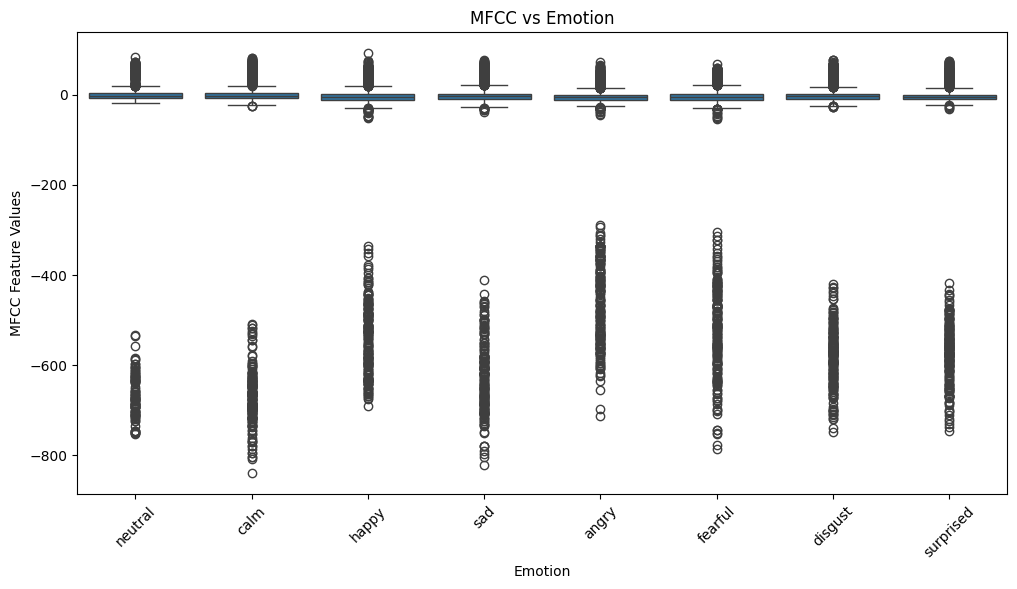

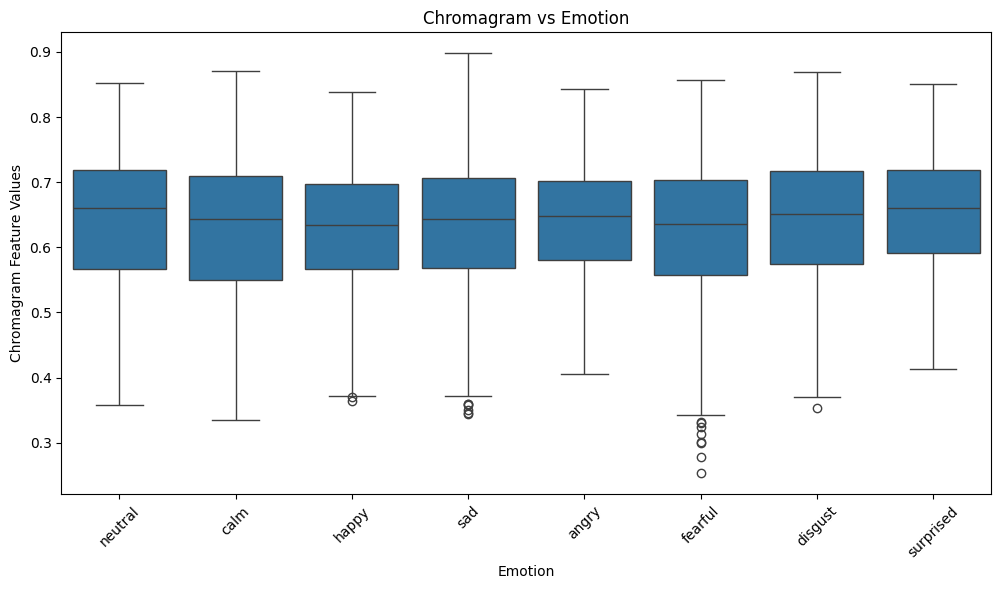

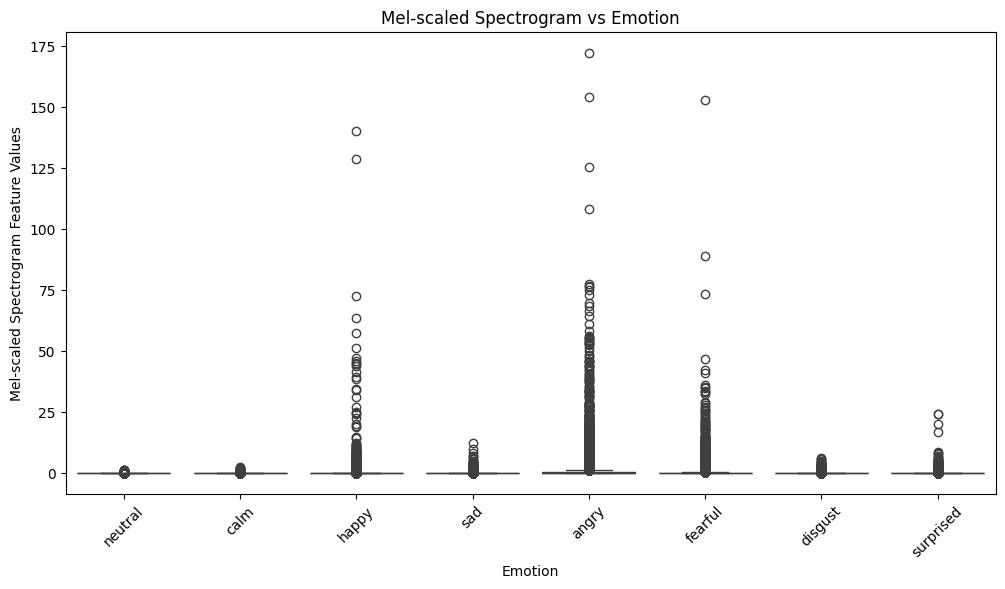

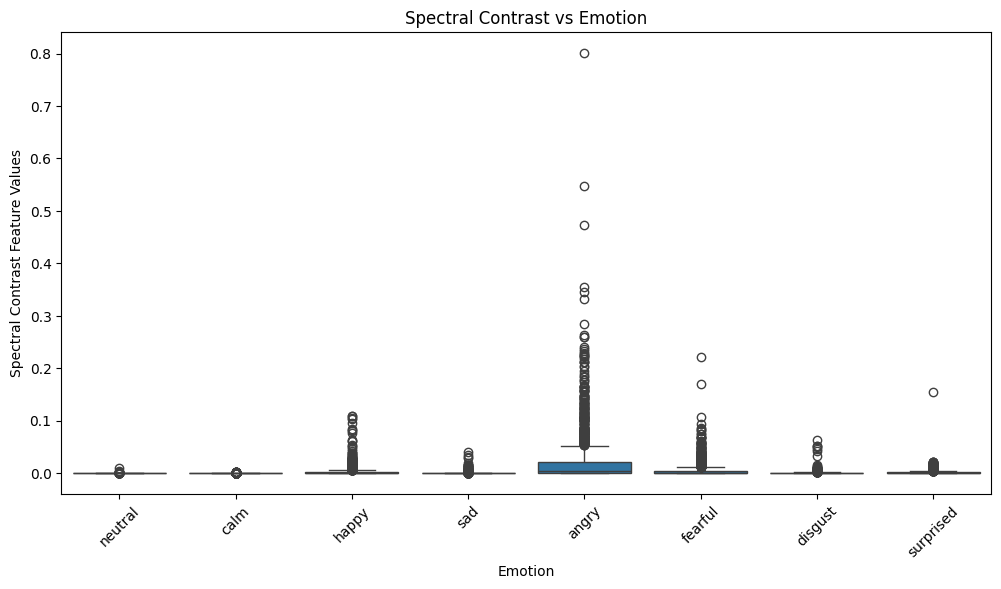

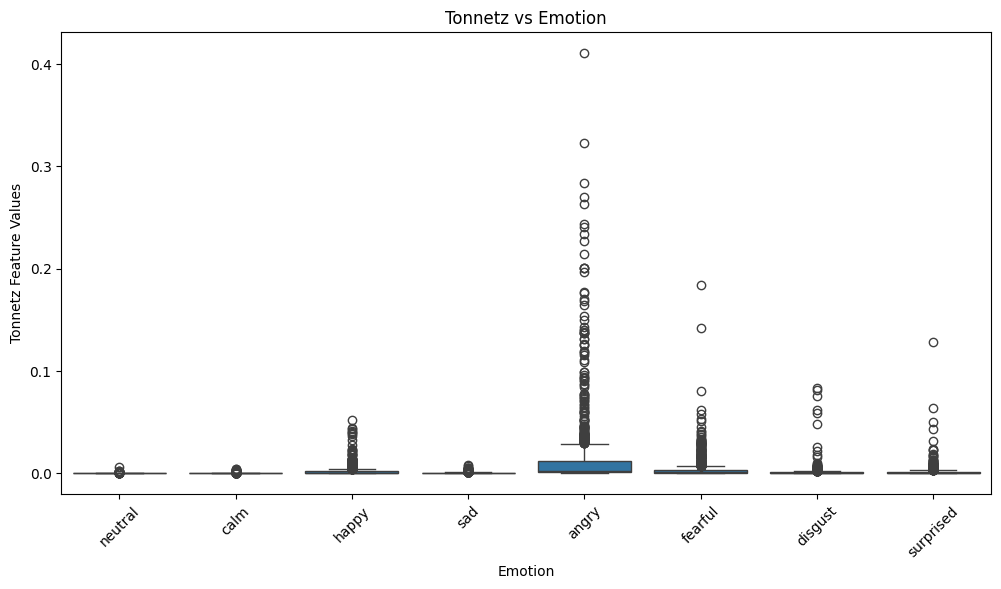

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to plot emotion distribution against each feature range
def plot_emotion_vs_features(csv_filename):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_filename)

    # Extract feature ranges
    mfcc_features = df.iloc[:, :13]  # MFCC features
    chroma_features = df.iloc[:, 13:25]  # Chromagram features
    mel_spectrogram_features = df.iloc[:, 25:125]  # Mel-scaled spectrogram features
    spectral_contrast_features = df.iloc[:, 125:132]  # Spectral contrast features
    tonnetz_features = df.iloc[:, 132:138]  # Tonnetz features

    # Emotion labels
    emotions = df['emotion']

    # Define function to plot individual feature ranges
    def plot_features(feature_data, feature_name, emotion_labels):
        plt.figure(figsize=(12, 6))
        feature_data['emotion'] = emotion_labels
        melted_data = feature_data.melt(id_vars='emotion', var_name='Feature', value_name='Value')
        sns.boxplot(x='emotion', y='Value', data=melted_data)
        plt.title(f'{feature_name} vs Emotion')
        plt.xlabel('Emotion')
        plt.ylabel(f'{feature_name} Feature Values')
        plt.xticks(rotation=45)
        plt.show()

    # Plot MFCC features
    plot_features(mfcc_features, 'MFCC', emotions)

    # Plot Chromagram features
    plot_features(chroma_features, 'Chromagram', emotions)

    # Plot Mel-scaled spectrogram features
    plot_features(mel_spectrogram_features, 'Mel-scaled Spectrogram', emotions)

    # Plot Spectral contrast features
    plot_features(spectral_contrast_features, 'Spectral Contrast', emotions)

    # Plot Tonnetz features
    plot_features(tonnetz_features, 'Tonnetz', emotions)

# Example usage
csv_filename = 'emotion_features_dataset.csv'
plot_emotion_vs_features(csv_filename)


## Loading and Balancing the Dataset

* `glob.glob`: Finds all .wav files in the specified directory.
* **Feature extraction**: For each file, extract features and append them to x, and the emotion label to y.


 **Balancing the dataset**:
* **Count samples**: Determine how many samples exist for each emotion.
* **Determine minimum samples**: Find the emotion with the fewest samples.
* **Select samples**: Ensure an equal number of samples for each emotion to avoid bias.


* `train_test_split`: Splits the balanced dataset into training and testing sets.


##### NOTE: Navigate to the folder that contains the dataset and add the suffix expression as shown in the code cell below.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data_from_csv(csv_filename, test_size=0.2):
    df = pd.read_csv(csv_filename)

    # Separate features and labels
    x = df.drop('emotion', axis=1).values
    y = df['emotion'].values

    # Balance the dataset
    unique_emotions = np.unique(y)
    min_samples = min([np.sum(y == emotion) for emotion in unique_emotions])

    balanced_x, balanced_y = [], []
    for emotion in unique_emotions:
        indices = np.where(y == emotion)[0][:min_samples]
        balanced_x.extend(x[indices])
        balanced_y.extend(y[indices])

    return train_test_split(np.array(balanced_x), balanced_y, test_size=test_size, random_state=9)

# Example usage:
csv_filename = 'emotion_features_chunked_1s.csv'


#### Split the data into train and test

In [30]:
x_train, x_test, y_train, y_test = load_data_from_csv(csv_filename, test_size=0.2)


## Feature Visualization

Plot the following features using `matplotlib`:
* **MFCC**: the mean of MFCC features.
* **Chromagram**: the mean of Chromagram features.
* **Mel-scaled spectrogram**: the mean of Mel-scaled spectrogram features.
* **Spectral Contrast**: the mean of Spectral Contrast features.
* **Tonnetz**: the mean of Tonnetz features.

## Range of the Indices after Feature Extraction
* `x[:, :13]` - MFCC features (13 features)
* `x[:, 13:25]` - Chromagram features (12 features)
* `x[:, 25:125]` - Mel-scaled spectrogram features (100 features) (The number of Mel bands can vary, but here we assume 100 Mel bands for illustration)
* `x[:, 125:132]` - Spectral contrast features (7 features)
* `x[:, 132:138]` - Tonnetz features (6 features)

In [35]:

def plot_features(features, title):
    plt.figure(figsize=(10, 4))
    plt.plot(features)
    plt.title(title)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.show()

# Visualize each type of feature
# Visualize each type of feature
def visualize_features(x, feature_name):
    # Extract MFCC (first 13 features)
    mfccs = x[:, :13]
    plot_features(np.mean(mfccs, axis=0), f"{feature_name} - MFCC")

    # Extract Chromagram (next 12 features: 13-25)
    chroma = x[:, 13:25]
    plot_features(np.mean(chroma, axis=0), f"{feature_name} - Chromagram")

    # Extract Mel-scaled spectrogram (next 100 features: 25-125)
    mel = x[:, 25:125]
    plot_features(np.mean(mel, axis=0), f"{feature_name} - Mel-scaled Spectrogram")

    # Extract Spectral Contrast (next 7 features: 125-132)
    contrast = x[:, 125:132]
    plot_features(np.mean(contrast, axis=0), f"{feature_name} - Spectral Contrast")

    # Extract Tonnetz (next 6 features: 132-138)
    tonnetz = x[:, 132:138]
    plot_features(np.mean(tonnetz, axis=0), f"{feature_name} - Tonnetz")


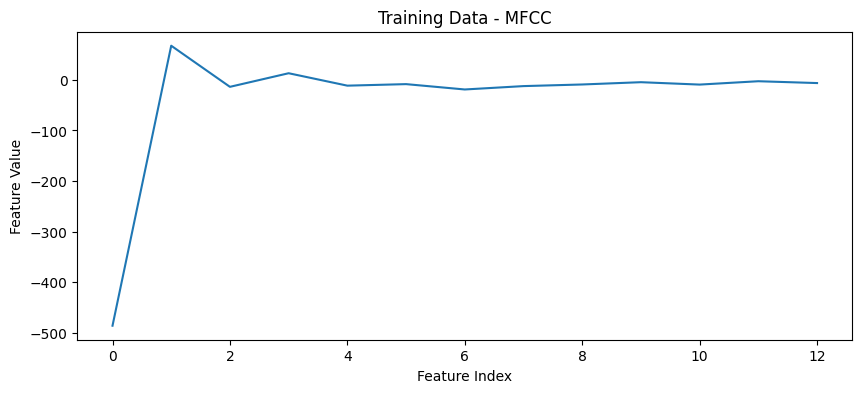

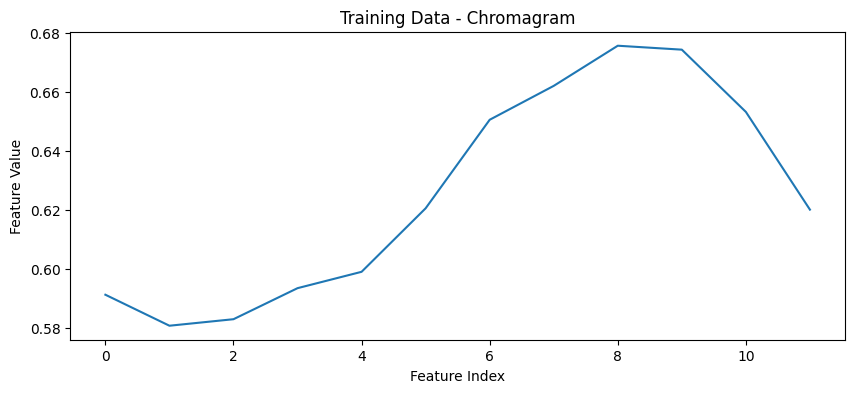

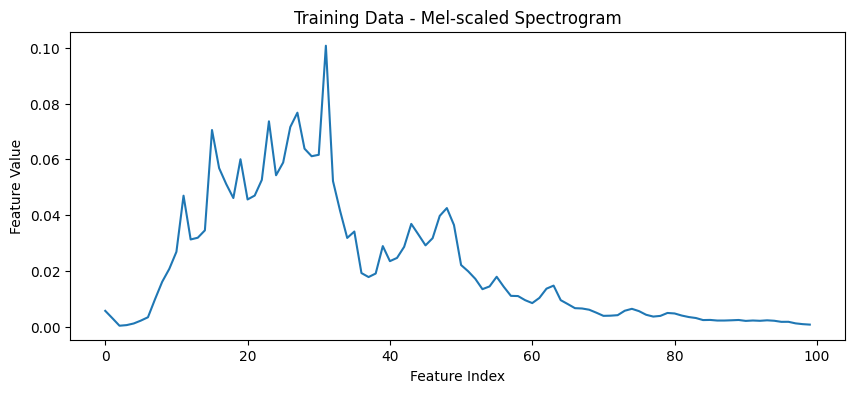

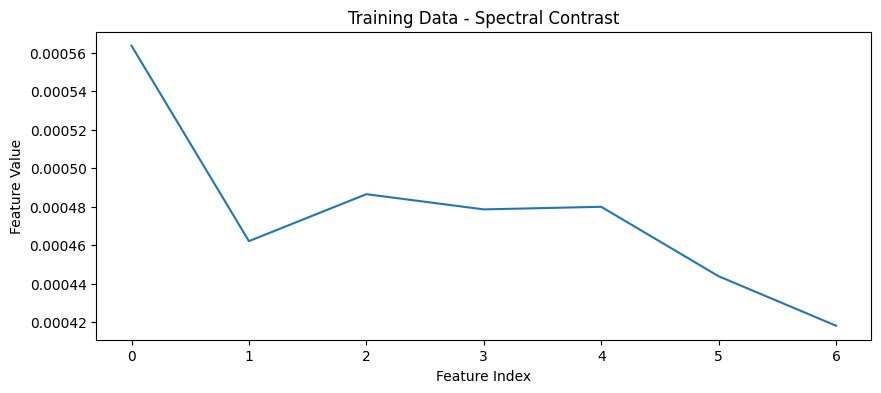

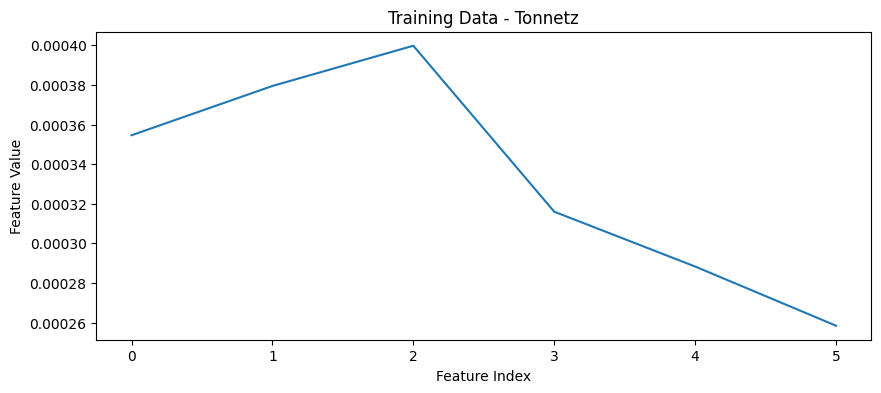

In [36]:
visualize_features(x_train, "Training Data")

## Encoding Labels and Standardizing Features

#### Label Encoding:
* **LabelEncoder**: Converts emotion labels from strings to numerical values.

#### Standardization:
* **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, which improves model performance.

In [37]:
# Code your implementation here

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

def relabel_emotions(emotion_labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(emotion_labels)
    return encoded_labels, encoder

y_train_encoded, encoder = relabel_emotions(y_train)
y_test_encoded = encoder.transform(y_test)  

# print(y_test_encoded)


# Standardize the features
def standardize_features(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)  # Use the same scaler to transform test data
    return x_train_scaled, x_test_scaled, scaler

# Call the standardization function
x_train_scaled, x_test_scaled, scaler = standardize_features(x_train, x_test)
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")

x_train_scaled shape: (1203, 166)
y_train_encoded shape: (1203,)


## Buliding the MLP Model

#### MLPClassifier:
* `hidden_layer_sizes`: Defines the architecture of the MLP with three layers of 256, 128, and 64 neurons respectively.
* `activation`: Uses the ReLU activation function.
* `solver`: Uses Adam optimizer.
* `max_iter`: Sets the maximum number of iterations for training.

#### Training and Evaluation:
* `mlp.fit`: Trains the model on the scaled training data.
* `mlp.score`: Evaluates the model’s accuracy on the test data.

In [38]:
# Code your implementation here
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

# Define the MLP model
def create_mlp_model():
    mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64),
                        activation='relu',
                        solver='adam',
                        max_iter=500,  # You can adjust this as needed
                        random_state=9)  # For reproducibility
    return mlp

# Create the model
mlp_model = create_mlp_model()

# Train the model on the scaled training data
mlp_model.fit(x_train_scaled, y_train_encoded)

# Evaluate the model's accuracy on the test data using mlp.score
accuracy_score_mlp = mlp_model.score(x_test_scaled, y_test_encoded)

#### Saving and Loading the Model
* **Saving the model**: By using `joblib.dump`, you store the trained model to a file, which can be reused later. This is useful for persisting models after training, allowing you to avoid retraining each time you want to use the model.
* **Loading the model**: By using `joblib.load`, you retrieve the stored model from the file and load it into your program, making it available for making predictions or further evaluations.

In [17]:
# Code your implementation here

# Save the model to a file
model_filename = 'mlp_model.joblib'
joblib.dump(mlp_model, model_filename)

print(f"Model saved to {model_filename}")
# Load the model from the file
loaded_model = joblib.load(model_filename)

print(f"Model loaded from {model_filename}")

# Use the loaded model to make predictions
# loaded_model_accuracy = loaded_model.score(x_test_scaled, y_test_encoded)
# print(f"Accuracy of the loaded model on test data: {loaded_model_accuracy:.2f}")

print(f'Shape of x_train_scaled: {x_train_scaled.shape}')
print(f'Shape of y_train_encoded: {y_train_encoded.shape}')



Model saved to mlp_model.joblib
Model loaded from mlp_model.joblib
Shape of x_train_scaled: (614, 166)
Shape of y_train_encoded: (614,)


## Fine Tuning HParams

* There are many ways of doing this, but we shall see RandomSearchCV.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'hidden_layer_sizes': [(256, 128, 64), (512, 256, 128), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [32, 64, 128],
    'max_iter': [200, 500, 1000]
}

mlp = MLPClassifier(random_state=9)

random_search_model = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=50, n_jobs=-1, cv=3, verbose=2, random_state=9)

random_search_model.fit(x_train_scaled, y_train_encoded)

print("Best parameters found: ", random_search_model.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (512, 256, 128), 'batch_size': 32, 'activation': 'relu'}


In [41]:
best_model = random_search_model.best_estimator_

accuracy = best_model.score(x_test_scaled, y_test_encoded)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 59.47%


In [42]:
joblib.dump(best_model, 'mlp_emotion_classifier_best_model2.joblib')
print("Best MLP model found and saved successfully.")

Best MLP model found and saved successfully.


In [21]:
best_model = joblib.load('mlp_emotion_classifier_best_model2.joblib')
print("Model Loaded successfully")

Model Loaded successfully


In [43]:
import joblib

# Save MLP model
joblib.dump(mlp_model, 'mlp_emotion_classifier_best_model2.joblib')

# Save encoder
joblib.dump(encoder, 'emotion_encoder.joblib')

# Save scaler
joblib.dump(scaler, 'feature_scaler.joblib')


['feature_scaler.joblib']

## Make Predictions with both models


In [33]:
mlp.fit(x_train_scaled, y_train_encoded)
# Code your implementation here
y_pred = loaded_model.predict(x_test_scaled)  # MLP predictions
y_pred_best = best_model.predict(x_test_scaled)

d:\KANHA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Metrics

* What are metrics and why do we need them?
    * Metrics are basically measures of how good your model actually is.
    * They can be used for comparative studies between multiple trials at training a model and also checking for any False Positive and False Negative outputs which can affect the `precision` and `F1-Scores`.
    * There are various types but here, we will be using 3 metrics and these are quite common for Machine Learning Models. They are:
        * Precision
        * Recall
        * F1 Score
    * Formulae for all are mentioned above and all the values for `TP(True Positive)`, `FP(False Positive)`, `TN(True Negative)` and `FN(False Negative)` are obtained from the `confusion matrix`.


In [34]:
# Code your implementation here - Confusion Matrix
# Code your implementation here - Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_encoded, y_pred)
cm_best = confusion_matrix(y_test_encoded, y_pred_best)

Now, evaluate for both the models. The initial `mlp` model and also for the `best_model` found by HParam tuning using Classification Reports.

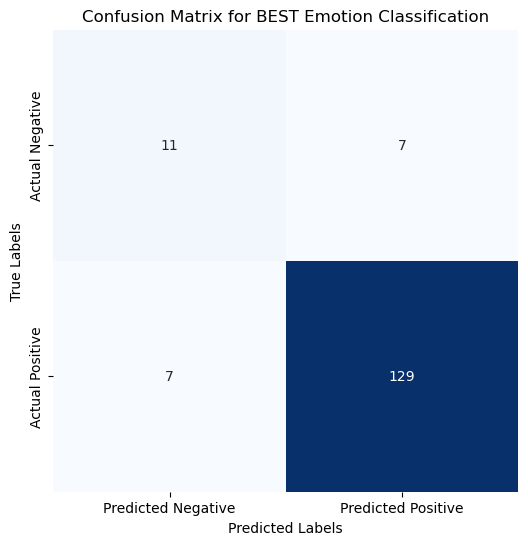

--- BEST Classification Report ---
Precision: 0.95
Recall: 0.95
F1 Score: 0.95



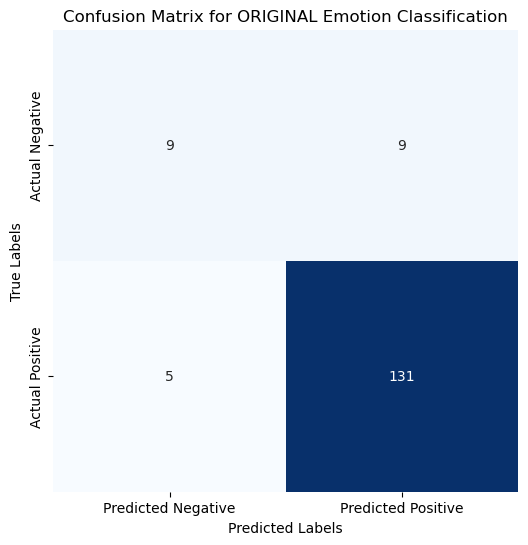

--- ORIGINAL Classification Report ---
Precision: 0.94
Recall: 0.96
F1 Score: 0.95

--- BEST Model Parameters ---
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (512, 256, 128), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 9, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
--- ORIGINAL Model Parameters ---
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (256, 128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Function to display the confusion matrix and print the classification metrics
def display_confusion_matrix_and_metrics(y_test_binary, y_pred_binary, model_name):
    # Calculate the binary confusion matrix
    conf_matrix_binary = confusion_matrix(y_test_binary, y_pred_binary)

    # Display the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix_binary, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name} Emotion Classification')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Extract TP, FP, TN, FN from the confusion matrix
    TN, FP, FN, TP = conf_matrix_binary.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Alternatively, using sklearn's built-in functions for convenience
    # precision = precision_score(y_test_binary, y_pred_binary)
    # recall = recall_score(y_test_binary, y_pred_binary)
    # f1 = f1_score(y_test_binary, y_pred_binary)

    # Print the results
    print(f'--- {model_name} Classification Report ---')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print()

# Binary labels for best_model
y_test_binary_best = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary_best = np.where(y_pred_best > 0, 1, 0)

# Binary labels for original_model
y_test_binary_original = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary_original = np.where(y_pred > 0, 1, 0)

# Display confusion matrix and metrics for BEST Emotion Classification Model
display_confusion_matrix_and_metrics(y_test_binary_best, y_pred_binary_best, 'BEST')

# Display confusion matrix and metrics for ORIGINAL Emotion Classification Model
display_confusion_matrix_and_metrics(y_test_binary_original, y_pred_binary_original, 'ORIGINAL')

# Print Model Parameters
print('--- BEST Model Parameters ---')
print(best_model.get_params())  # Replace `best_model` with your actual model variable

print('--- ORIGINAL Model Parameters ---')
print(mlp_model.get_params())  # Replace `original_model` with your actual model variable


## K-Fold Cross Validation

* K-Fold cross-validation is a statistical method used to evaluate the performance of a machine learning model.
* It involves partitioning the original dataset into `K subsets` or `folds`.

In [46]:
# Code your implementation here
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import numpy as np
# import joblib

# Load your model
best_model = joblib.load('mlp_emotion_classifier_best_model2.joblib')

# Assuming x_data is your feature data and y_data is your true labels
x_data = x_train_scaled  # Replace this witAh your actual features
y_data = y_train_encoded  # Replace this with your actual labels

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=9)
y_true_all, y_pred_all = [], []

# Train and evaluate with K-Fold
for train_index, test_index in kf.split(x_train_scaled):
    x_train_kf, x_test_kf = x_train_scaled[train_index], x_train_scaled[test_index]
    y_train_kf, y_test_kf = np.array(y_train_encoded)[train_index], np.array(y_train_encoded)[test_index]

    # Initialize a new MLP model for each fold
    mlp_kf = create_mlp_model()  # Assuming create_mlp_model() initializes a new model
    mlp_kf.fit(x_train_kf, y_train_kf)

    y_pred_kf = mlp_kf.predict(x_test_kf)

    # Store true and predicted values for overall comparison
    y_true_all.extend(y_test_kf)
    y_pred_all.extend(y_pred_kf)


## Now, Let's perform a comparitive study

* Use Accuracy, Classification Reports and Confusion Matrices to compare your models.
* When it comes to the syntax of importing a model and using it, they all look nearly the same to sight.

### MLP

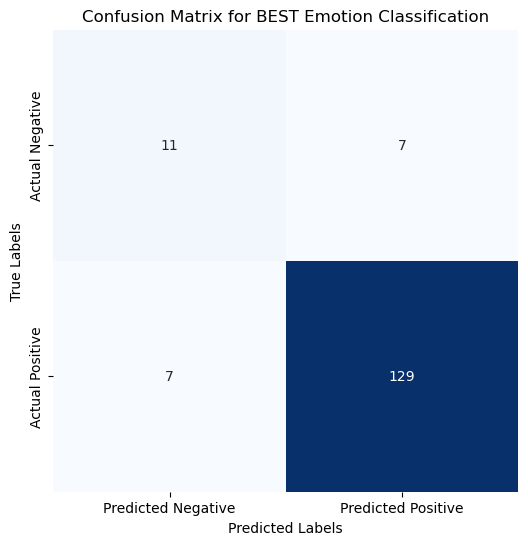

--- BEST Classification Report ---
Precision: 0.95
Recall: 0.95
F1 Score: 0.95



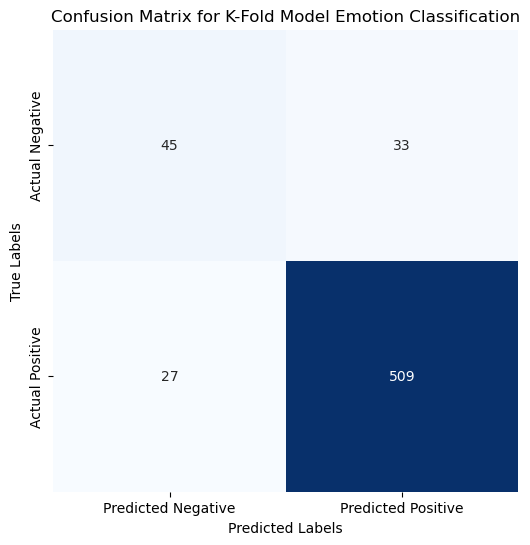

--- K-Fold Model Classification Report ---
Precision: 0.94
Recall: 0.95
F1 Score: 0.94



In [48]:
display_confusion_matrix_and_metrics(y_test_binary_best, y_pred_binary_best, 'BEST')

# Convert true and predicted labels to binary (for binary confusion matrix)
y_true_binary_kf = np.where(np.array(y_true_all) > 0, 1, 0)
y_pred_binary_kf = np.where(np.array(y_pred_all) > 0, 1, 0)

# Display confusion matrix and metrics for the K-Fold model
display_confusion_matrix_and_metrics(y_true_binary_kf, y_pred_binary_kf, 'K-Fold Model')




### SVM Classifier => Support Vector Machine

* A link has been attached for your reference below. It explains the basics of SVM very well.

* In short, A `Support Vector Machine` (SVM) is a powerful `classification` algorithm that finds the optimal boundary, known as the hyperplane, which best separates data points of different classes. It uses two support vectors which are critical data points closest to the boundary, which define and maximize the boundary. This ensures that an optimal boundary is set so that it can separate the two classes accurately.

* https://www.geeksforgeeks.org/support-vector-machine-algorithm/

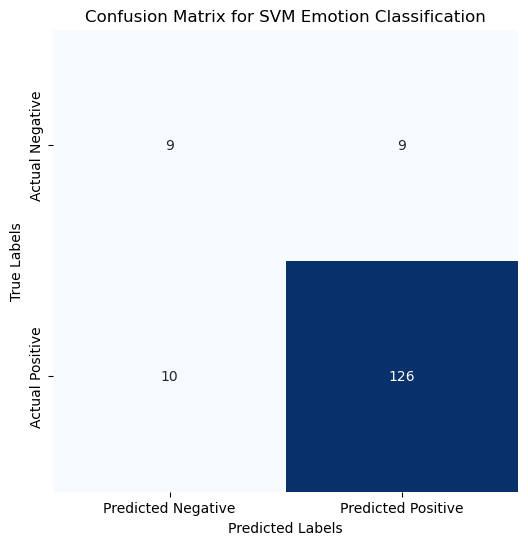

--- SVM Classification Report ---
Precision: 0.93
Recall: 0.93
F1 Score: 0.93



In [54]:


# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(x_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test_scaled)

# Binary labels for SVM
y_test_binary_svm = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary_svm = np.where(y_pred_svm > 0, 1, 0)


display_confusion_matrix_and_metrics(y_test_binary_svm, y_pred_binary_svm, 'SVM')


### KNN Classifier

* K-Nearest Neighbors, is also another Supervised Classification algorithm. Basically, we define the number of neighbors first, then find the distances of the upcoming points from the rest of the points. Then, segregate the points after finding the `lowest distance`. Distances are of many types but the common ones are Euclidean, Manhattan, and Minkowski distances.

* Then, we will find the new centroid (collective centroid) of that cluster and start from there again, till all the values are covered.

* Note: Don't confuse this with K-Means clustering, which is an Unsupervised Algorithm.

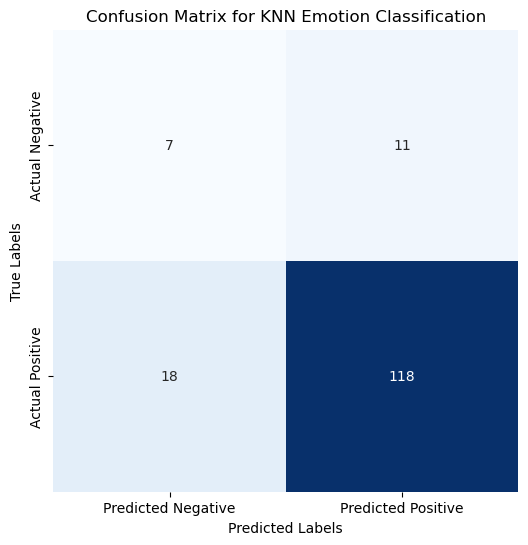

--- KNN Classification Report ---
Precision: 0.91
Recall: 0.87
F1 Score: 0.89



In [58]:

from sklearn.neighbors import KNeighborsClassifier


# Initialize the KNN model with a specified number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(x_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_knn = knn_model.predict(x_test_scaled)

# Binary labels for KNN
y_test_binary_knn = np.where(y_test_encoded > 0, 1, 0)
y_pred_binary_knn = np.where(y_pred_knn > 0, 1, 0)


display_confusion_matrix_and_metrics(y_test_binary_knn, y_pred_binary_knn, 'KNN')
